In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
import glob
import time 
from nltk import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


In [59]:
benign = pd.read_csv('benign.csv', header=0)
inline_obf = pd.read_csv('inline_obfuscation.csv', header=0)
percent_obf = pd.read_csv('invalid_percent_encoding_obfuscation.csv', header=0)
url_obf = pd.read_csv('url_encoding_obfuscation.csv', header=0)
nest_obf = pd.read_csv('nested_command_obfuscation.csv', header=0)

In [60]:
# create a new df with bengin and an obf togther
train_inline = pd.concat([benign, inline_obf], ignore_index=True)
train_percent = pd.concat([benign, percent_obf], ignore_index=True)
train_url = pd.concat([benign, url_obf], ignore_index=True)
train_nest = pd.concat([benign, nest_obf], ignore_index=True)

In [61]:
# get rid of NaN entries
train_inline = train_inline.dropna()
train_percent = train_percent.dropna()
train_url = train_url.dropna()
train_nest = train_nest.dropna()

In [85]:
# vectorize the data
vectorizer = CountVectorizer(stop_words='english', vocabulary=None, max_features=29000,)
X_inline = vectorizer.fit_transform(train_inline['Query'])
X_percent = vectorizer.fit_transform(train_percent['Query'])
X_url = vectorizer.fit_transform(train_url['Query'])
X_nest = vectorizer.fit_transform(train_nest['Query'])


In [90]:
# get the labels
y_inline = train_inline['Label']
y_percent = train_percent['Label']
y_url = train_url['Label']
y_nest = train_nest['Label']

In [91]:
# train test split
from sklearn.model_selection import train_test_split
X_inline_train, X_inline_test, y_inline_train, y_inline_test = train_test_split(X_inline, y_inline, test_size=0.2, random_state=0)
X_percent_train, X_percent_test, y_percent_train, y_percent_test = train_test_split(X_percent, y_percent, test_size=0.2, random_state=0)
X_url_train, X_url_test, y_url_train, y_url_test = train_test_split(X_url, y_url, test_size=0.2, random_state=0)
X_nest_train, X_nest_test, y_nest_train, y_nest_test = train_test_split(X_nest, y_nest, test_size=0.2, random_state=0)

In [65]:
# get classifier and eval metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [92]:
# inline classifier
classifier_inline_obf = MultinomialNB()
classifier_inline_obf.fit(X_inline_train, y_inline_train)
y_inline_pred = classifier_inline_obf.predict(X_inline_test)
print(confusion_matrix(y_inline_test, y_inline_pred))
print(accuracy_score(y_inline_test, y_inline_pred))
print(classification_report(y_inline_test, y_inline_pred))

[[4440   61]
 [ 128 2393]]
0.9730845912845343
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4501
           1       0.98      0.95      0.96      2521

    accuracy                           0.97      7022
   macro avg       0.97      0.97      0.97      7022
weighted avg       0.97      0.97      0.97      7022



In [93]:
# invalid percent classifier
classifier_percent_obf = MultinomialNB()
classifier_percent_obf.fit(X_percent_train, y_percent_train)
y_percent_pred = classifier_percent_obf.predict(X_percent_test)
print(confusion_matrix(y_percent_test, y_percent_pred))
print(accuracy_score(y_percent_test, y_percent_pred))
print(classification_report(y_percent_test, y_percent_pred))

[[4428   73]
 [ 159 2362]]
0.9669609797778411
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4501
           1       0.97      0.94      0.95      2521

    accuracy                           0.97      7022
   macro avg       0.97      0.96      0.96      7022
weighted avg       0.97      0.97      0.97      7022



In [94]:
# nested command classifier
classifier_url_obf = MultinomialNB()
classifier_url_obf.fit(X_url_train, y_url_train)
y_url_pred = classifier_url_obf.predict(X_url_test)
print(confusion_matrix(y_url_test, y_url_pred))
print(accuracy_score(y_url_test, y_url_pred))
print(classification_report(y_url_test, y_url_pred))

[[4508   19]
 [   8 2487]]
0.9961549416120763
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4527
           1       0.99      1.00      0.99      2495

    accuracy                           1.00      7022
   macro avg       1.00      1.00      1.00      7022
weighted avg       1.00      1.00      1.00      7022



In [95]:
# nested command classifier
classifier_nest_obf = MultinomialNB()
classifier_nest_obf.fit(X_nest_train, y_nest_train)
y_nest_pred = classifier_nest_obf.predict(X_nest_test)
print(confusion_matrix(y_nest_test, y_nest_pred))
print(accuracy_score(y_nest_test, y_nest_pred))
print(classification_report(y_nest_test, y_nest_pred))

[[4445   56]
 [  48 2473]]
0.9851894047279978
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4501
           1       0.98      0.98      0.98      2521

    accuracy                           0.99      7022
   macro avg       0.98      0.98      0.98      7022
weighted avg       0.99      0.99      0.99      7022



In [96]:
# baseline
unobf = pd.read_csv('queries.csv', header=0)
unobf = unobf.dropna()
X_unobf = vectorizer.fit_transform(unobf['Query'])
y_unobf = unobf['Label']
X_unobf_train, X_unobf_test, y_unobf_train, y_unobf_test = train_test_split(X_unobf, y_unobf, test_size=0.2, random_state=0)

In [97]:
# classify plain SQL injections
classifier_unobf = MultinomialNB()
classifier_unobf.fit(X_unobf_train, y_unobf_train)
y_unobf_pred = classifier_unobf.predict(X_unobf_test)
print(confusion_matrix(y_unobf_test, y_unobf_pred))
print(accuracy_score(y_unobf_test, y_unobf_pred))
print(classification_report(y_unobf_test, y_unobf_pred))

[[4478   76]
 [ 212 2256]]
0.9589860438621476
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4554
           1       0.97      0.91      0.94      2468

    accuracy                           0.96      7022
   macro avg       0.96      0.95      0.95      7022
weighted avg       0.96      0.96      0.96      7022



In [98]:
## OBFUSCATING THE ENTIRE DATASET
#
all_inline = pd.read_csv('all_inline.csv', header=0)
all_percent = pd.read_csv('all_invalid_percent_encoding.csv', header=0)
all_url = pd.read_csv('all_url_encoding.csv', header=0)
all_nest = pd.read_csv('all_nested_command.csv', header=0)

In [99]:
# Dropping NaN values
all_inline = all_inline.dropna()
all_percent = all_percent.dropna()
all_url = all_url.dropna()
all_nest = all_nest.dropna()

In [100]:
# vectorizing
X_all_inline = vectorizer.fit_transform(all_inline['Query'])
X_all_percent = vectorizer.fit_transform(all_percent['Query'])
X_all_url = vectorizer.fit_transform(all_url['Query'])
X_all_nest = vectorizer.fit_transform(all_nest['Query'])

In [101]:
# get labels
y_all_inline = all_inline['Label']
y_all_percent = all_percent['Label']
y_all_url = all_url['Label']
y_all_nest = all_nest['Label']

In [102]:
# train test split
X_all_inline_train, X_all_inline_test, y_all_inline_train, y_all_inline_test = train_test_split(X_all_inline, y_all_inline, test_size=0.2, random_state=0)
X_all_percent_train, X_all_percent_test, y_all_percent_train, y_all_percent_test = train_test_split(X_all_percent, y_all_percent, test_size=0.2, random_state=0)
X_all_url_train, X_all_url_test, y_all_url_train, y_all_url_test = train_test_split(X_all_url, y_all_url, test_size=0.2, random_state=0)
X_all_nest_train, X_all_nest_test, y_all_nest_train, y_all_nest_test = train_test_split(X_all_nest, y_all_nest, test_size=0.2, random_state=0)

In [103]:
# classify inline attacks
classifier_inline = MultinomialNB()
classifier_inline.fit(X_all_inline_train, y_all_inline_train)
y_all_inline_pred = classifier_inline.predict(X_all_inline_test)
print(confusion_matrix(y_all_inline_test, y_all_inline_pred))
print(accuracy_score(y_all_inline_test, y_all_inline_pred))
print(classification_report(y_all_inline_test, y_all_inline_pred))

[[4474   80]
 [ 218 2250]]
0.9575619481629165
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4554
           1       0.97      0.91      0.94      2468

    accuracy                           0.96      7022
   macro avg       0.96      0.95      0.95      7022
weighted avg       0.96      0.96      0.96      7022



In [104]:
# classify invalid percent attacks
classifier_percent = MultinomialNB()
classifier_percent.fit(X_all_percent_train, y_all_percent_train)
y_all_percent_pred = classifier_percent.predict(X_all_percent_test)
print(confusion_matrix(y_all_percent_test, y_all_percent_pred))
print(accuracy_score(y_all_percent_test, y_all_percent_pred))
print(classification_report(y_all_percent_test, y_all_percent_pred))

[[4471   83]
 [ 241 2227]]
0.953859299344916
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4554
           1       0.96      0.90      0.93      2468

    accuracy                           0.95      7022
   macro avg       0.96      0.94      0.95      7022
weighted avg       0.95      0.95      0.95      7022



In [105]:
# classify url encoding attacks
classifier_url = MultinomialNB()
classifier_url.fit(X_all_url_train, y_all_url_train)
y_all_url_pred = classifier_url.predict(X_all_url_test)
print(confusion_matrix(y_all_url_test, y_all_url_pred))
print(accuracy_score(y_all_url_test, y_all_url_pred))
print(classification_report(y_all_url_test, y_all_url_pred))

[[3999  551]
 [ 134 2340]]
0.9024772209567198
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4550
           1       0.81      0.95      0.87      2474

    accuracy                           0.90      7024
   macro avg       0.89      0.91      0.90      7024
weighted avg       0.91      0.90      0.90      7024



In [106]:
# classify nested command attacks
classifier_nest = MultinomialNB()
classifier_nest.fit(X_all_nest_train, y_all_nest_train)
y_all_nest_pred = classifier_nest.predict(X_all_nest_test)
print(confusion_matrix(y_all_nest_test, y_all_nest_pred))
print(accuracy_score(y_all_nest_test, y_all_nest_pred))
print(classification_report(y_all_nest_test, y_all_nest_pred))

[[4480   74]
 [ 152 2316]]
0.9678154371973796
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4554
           1       0.97      0.94      0.95      2468

    accuracy                           0.97      7022
   macro avg       0.97      0.96      0.96      7022
weighted avg       0.97      0.97      0.97      7022



In [111]:
## What if we don't train on obfuscated data?
# Let's classify the obfuscated data using the model trained on the unobfuscated data
#
# inline
y_inline_pred_on_reg = classifier_unobf.predict(X_inline_test)
print(confusion_matrix(y_inline_test, y_inline_pred_on_reg))
print(accuracy_score(y_inline_test, y_inline_pred_on_reg))
print(classification_report(y_inline_test, y_inline_pred_on_reg))

[[4080  421]
 [1486 1035]]
0.7284249501566505
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      4501
           1       0.71      0.41      0.52      2521

    accuracy                           0.73      7022
   macro avg       0.72      0.66      0.67      7022
weighted avg       0.73      0.73      0.71      7022



In [112]:
# invalid percent
y_percent_pred_on_reg = classifier_unobf.predict(X_percent_test)
print(confusion_matrix(y_percent_test, y_percent_pred_on_reg))
print(accuracy_score(y_percent_test, y_percent_pred_on_reg))
print(classification_report(y_percent_test, y_percent_pred_on_reg))

[[4119  382]
 [1402 1119]]
0.7459413272571916
              precision    recall  f1-score   support

           0       0.75      0.92      0.82      4501
           1       0.75      0.44      0.56      2521

    accuracy                           0.75      7022
   macro avg       0.75      0.68      0.69      7022
weighted avg       0.75      0.75      0.73      7022



In [114]:
# url encoding
y_url_pred_on_reg = classifier_unobf.predict(X_url_test)
print(confusion_matrix(y_url_test, y_url_pred_on_reg))
print(accuracy_score(y_url_test, y_url_pred_on_reg))
print(classification_report(y_url_test, y_url_pred_on_reg))

[[4094  433]
 [ 138 2357]]
0.9186841355739106
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      4527
           1       0.84      0.94      0.89      2495

    accuracy                           0.92      7022
   macro avg       0.91      0.92      0.91      7022
weighted avg       0.92      0.92      0.92      7022



In [115]:
# nested command
y_nest_pred_on_reg = classifier_unobf.predict(X_nest_test)
print(confusion_matrix(y_nest_test, y_nest_pred_on_reg))
print(accuracy_score(y_nest_test, y_nest_pred_on_reg))
print(classification_report(y_nest_test, y_nest_pred_on_reg))

[[4121  380]
 [1458 1063]]
0.7382512104813443
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      4501
           1       0.74      0.42      0.54      2521

    accuracy                           0.74      7022
   macro avg       0.74      0.67      0.68      7022
weighted avg       0.74      0.74      0.72      7022



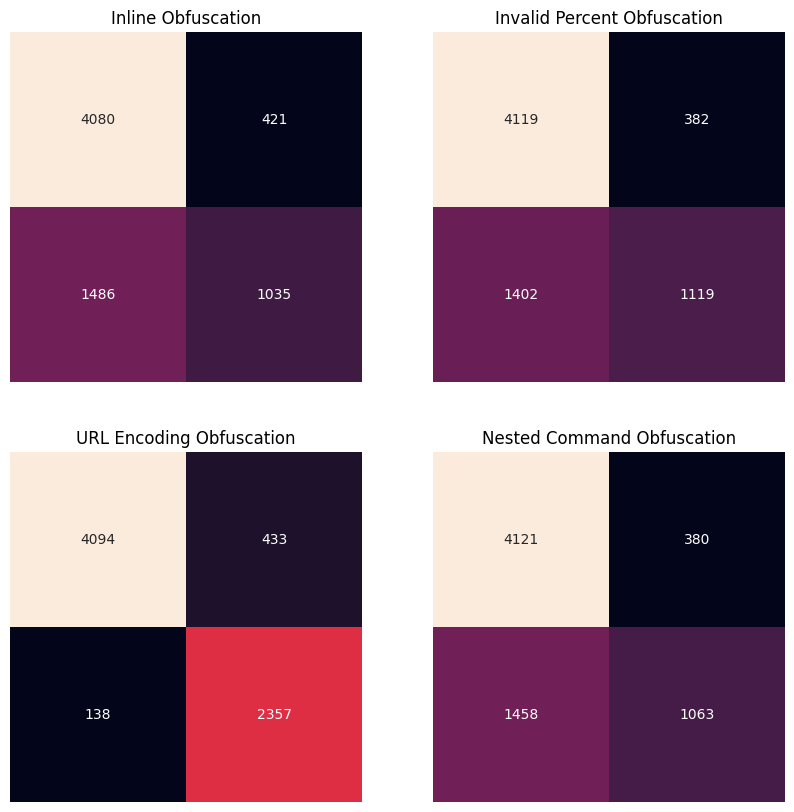

In [134]:
import seaborn as sns

# plot confusion matrices as a four panel figure for the predictions on classifier_unobf for inline, percent, url, and nested
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(
    confusion_matrix(y_inline_test, y_inline_pred_on_reg),
    annot=True,
    cbar=False,
    fmt="g",
    ax=ax[0][0],
    xticklabels=[],
    yticklabels=[],
)
ax[0][0].set_title("Inline Obfuscation")
sns.heatmap(
    confusion_matrix(y_percent_test, y_percent_pred_on_reg),
    annot=True,
    cbar=False,
    fmt="g",
    ax=ax[0][1],
    xticklabels=[],
    yticklabels=[],
)
ax[0][1].set_title("Invalid Percent Obfuscation")
sns.heatmap(
    confusion_matrix(y_url_test, y_url_pred_on_reg),
    annot=True,
    cbar=False,
    fmt="g",
    ax=ax[1][0],
    xticklabels=[],
    yticklabels=[],
)
ax[1][0].set_title("URL Encoding Obfuscation")
sns.heatmap(
    confusion_matrix(y_nest_test, y_nest_pred_on_reg),
    annot=True,
    cbar=False,
    fmt="g",
    ax=ax[1][1],
    xticklabels=[],
    yticklabels=[],
)
ax[1][1].set_title("Nested Command Obfuscation")
plt.show()

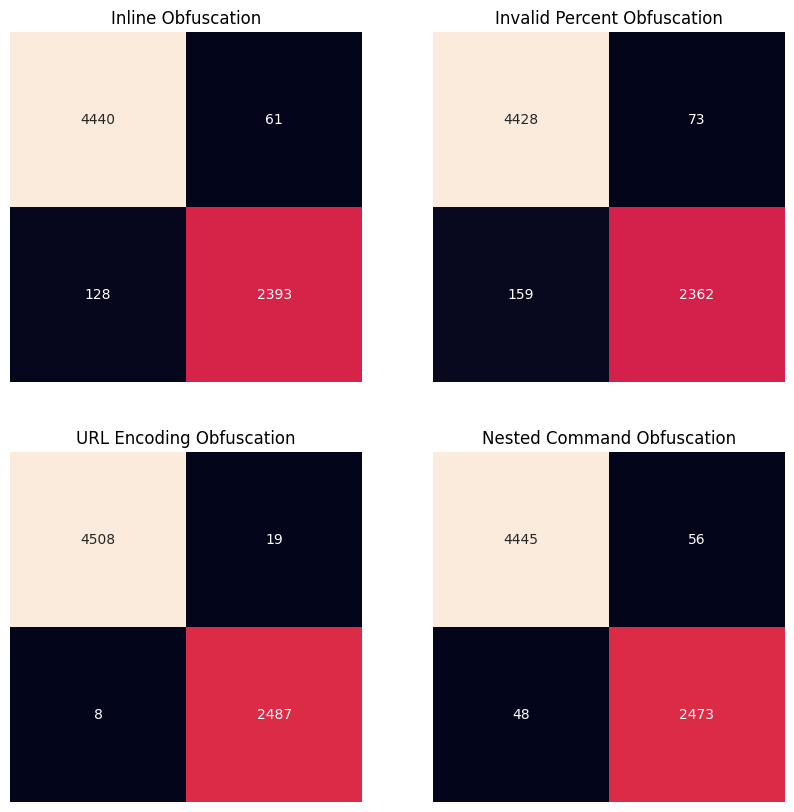

In [135]:
# plot confusion matrices as a four panel figure for the predictions on fit classifier for inline, percent, url, and nested
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(
    confusion_matrix(y_inline_test, y_inline_pred),
    annot=True,
    cbar=False,
    fmt="g",
    ax=ax[0][0],
    xticklabels=[],
    yticklabels=[],
)
ax[0][0].set_title("Inline Obfuscation")
sns.heatmap(
    confusion_matrix(y_percent_test, y_percent_pred),
    annot=True,
    cbar=False,
    fmt="g",
    ax=ax[0][1],
    xticklabels=[],
    yticklabels=[],
)
ax[0][1].set_title("Invalid Percent Obfuscation")
sns.heatmap(
    confusion_matrix(y_url_test, y_url_pred),
    annot=True,
    cbar=False,
    fmt="g",
    ax=ax[1][0],
    xticklabels=[],
    yticklabels=[],
)
ax[1][0].set_title("URL Encoding Obfuscation")
sns.heatmap(
    confusion_matrix(y_nest_test, y_nest_pred),
    annot=True,
    cbar=False,
    fmt="g",
    ax=ax[1][1],
    xticklabels=[],
    yticklabels=[],
)
ax[1][1].set_title("Nested Command Obfuscation")
plt.show()